## <font color=purple> Problem statement: </font>

### <font color=brown> Predicting the demand for shared bikes </font>

#### <font color=green> Importing Libraries </font>

In [712]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [713]:
bsp = pd.read_csv('/Users/shweta/Downloads/day (1).csv')

In [714]:
bsp.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [715]:
bsp.shape

(730, 16)

In [716]:
bsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<font color=blue> There are no null values present in the given Dataset </font>

In [717]:
bsp.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [718]:
bsp.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [719]:
bsp.columns 

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<font color=blue> From the Dataset dictionary we can see that columns 'instant' 'casual' 'registered' are not of use in our analysis and hence we should drop it. </font>

#### <font color=green> Dropping 'instant' 'casual' 'registered' columns </font>

In [720]:
bsp = bsp.drop(columns=['instant','casual','registered'])

#### <font color=green> Handling 'dteday' column </font>

In [721]:
bsp['date']=pd.to_datetime(bsp['dteday'],format='%d-%m-%Y')
bsp.loc[~((bsp.date.dt.weekday+1)%7 == bsp.weekday)]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date


In [722]:
bsp.loc[~(bsp.date.dt.year-2018 == bsp.yr),:]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date


In [723]:
bsp.loc[~(bsp.date.dt.month == bsp.mnth),:]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date


In [724]:
def finding_workingday(lis):
    holiday,weekday,workingday=lis[0],lis[1],lis[2]
    if ((holiday==1) or (weekday==0) or (weekday==6)):
        calculate_workingday=0
    else:
        calculate_workingday=1
    if calculate_workingday==workingday:
        return True
    else:
        return False
    
#check if working days are properly mapped by excluding weekday and holidays
bsp[~bsp.loc[:,['holiday','weekday','workingday']].apply(lambda x:finding_workingday(x),axis=1)]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date


In [725]:
bsp = bsp.drop(columns=['dteday'])

#### <font color=green> Handling categorical values </font>

In [726]:
def weekday_map(x):
    week_dict={0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}
    return(week_dict[x])

def month_map(x):
    mnth_dict={1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
    return(mnth_dict[x])

def year_map(x):
    yr_dict={0:'2018',1:'2019'}
    return(yr_dict[x])

def season_map(x):
    season_dict={1:'spring',2:'summer',3:'fall',4:'winter'}
    return(season_dict[x])

In [727]:
#convert categories to give better description
bsp['season']=bsp['season'].apply(lambda x:season_map(x))
bsp['yr']=bsp['yr'].apply(lambda x:year_map(x))
bsp['mnth']=bsp['mnth'].apply(lambda x:month_map(x))
bsp['weekday']=bsp['weekday'].apply(lambda x:weekday_map(x))


In [728]:
#Converting columns to categorical type
for i in  ['season','yr','mnth','holiday','weekday','workingday','weathersit']:
    bsp[i]=pd.Categorical(bsp[i])

#### <font color=green> Visualisation </font>

<font color=blue> Analysing 'temp' column </font>

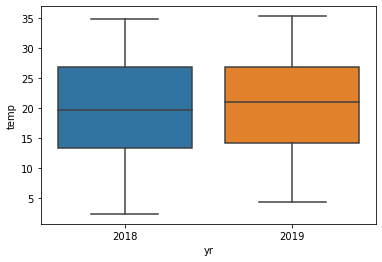

In [729]:
sns.boxplot(x="yr", y="temp", data=bsp)

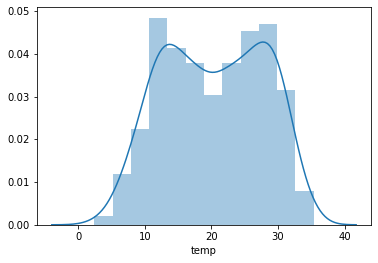

In [730]:
sns.distplot(bsp['temp'])

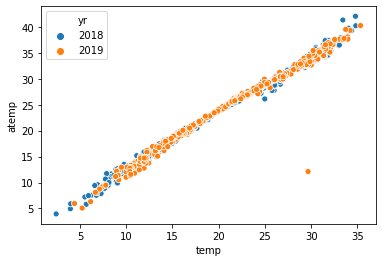

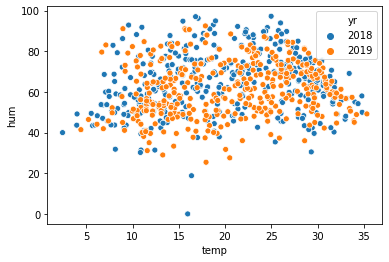

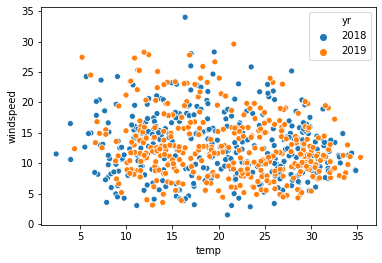

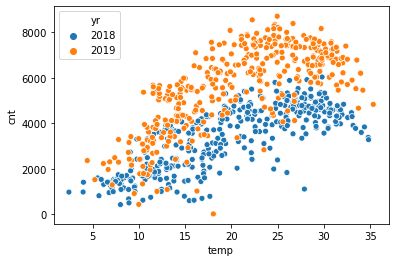

In [731]:
lis  = ['atemp', 'hum', 'windspeed', 'cnt']
for i in lis:
    sns.scatterplot(data=bsp, x="temp", y=i, hue="yr")
    plt.show()

<font color=blue> Analysing 'atemp' column </font>

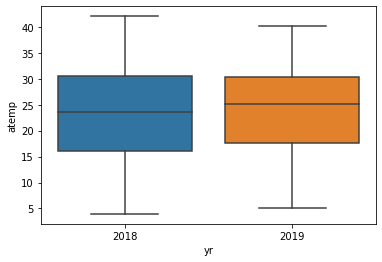

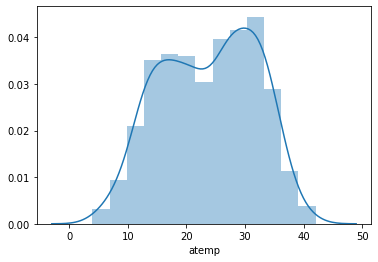

In [732]:
sns.boxplot(x="yr", y="atemp", data=bsp)
plt.show()
sns.distplot(bsp['atemp'])
plt.show()

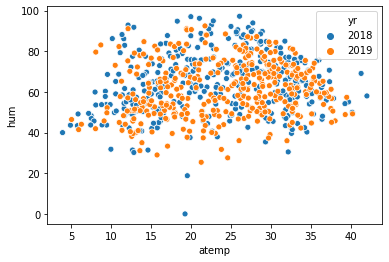

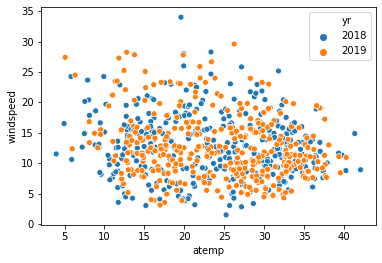

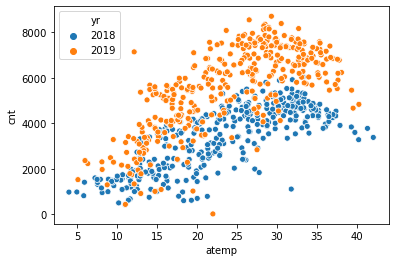

In [733]:
lis  = ['hum', 'windspeed', 'cnt']
for i in lis:
    sns.scatterplot(data=bsp, x="atemp", y=i, hue="yr")
    plt.show()

<font color=blue> Analysing 'hum' column </font>

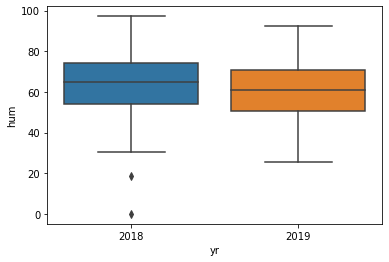

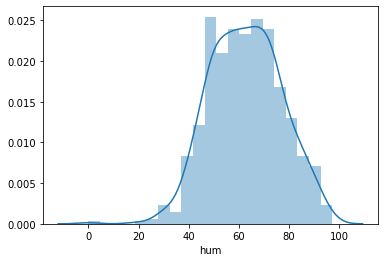

In [734]:
sns.boxplot(x="yr", y="hum", data=bsp)
plt.show()
sns.distplot(bsp['hum'])
plt.show()

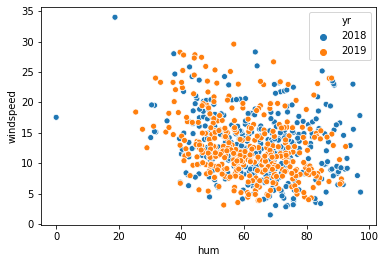

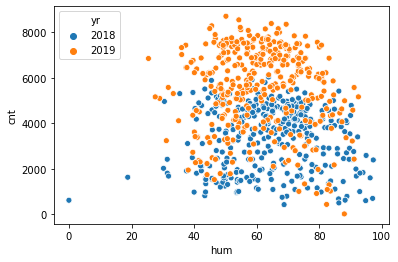

In [735]:
lis  = ['windspeed', 'cnt']
for i in lis:
    sns.scatterplot(data=bsp, x="hum", y=i, hue="yr")
    plt.show()

<font color=blue> Analysing 'windspeed' column </font>

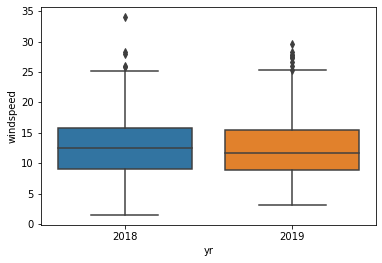

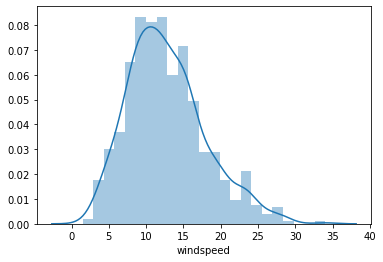

In [736]:
sns.boxplot(x="yr", y="windspeed", data=bsp)
plt.show()
sns.distplot(bsp['windspeed'])
plt.show()

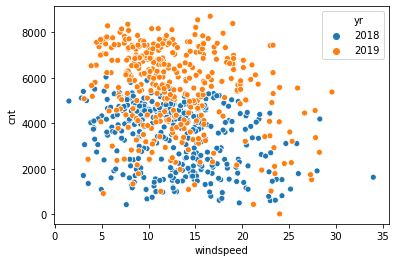

In [737]:
sns.scatterplot(data=bsp, x="windspeed", y='cnt', hue="yr")
plt.show()

<font color=blue> Analysing 'cnt' column </font>

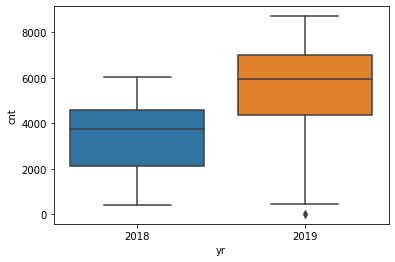

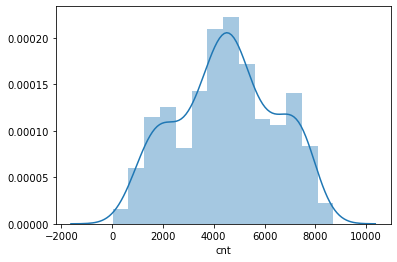

In [738]:
sns.boxplot(x="yr", y="cnt", data=bsp)
plt.show()
sns.distplot(bsp['cnt'])
plt.show()

<font color=blue> Analysing 'season' column </font>

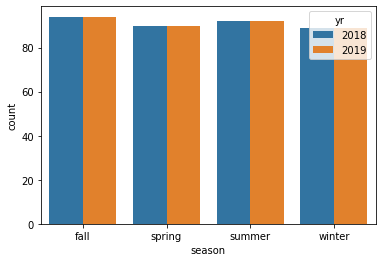

In [739]:
sns.countplot(x="season", data=bsp, hue = 'yr')

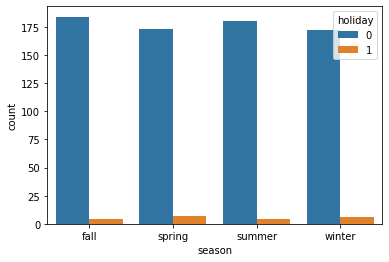

In [740]:
sns.countplot(x="season", data=bsp, hue = 'holiday')

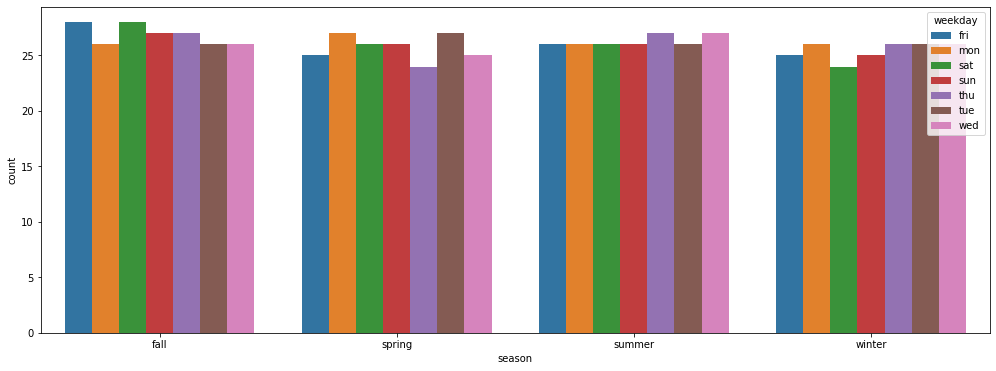

In [741]:
plt.figure(figsize = (17,6))
sns.countplot(x="season", data=bsp, hue = 'weekday')

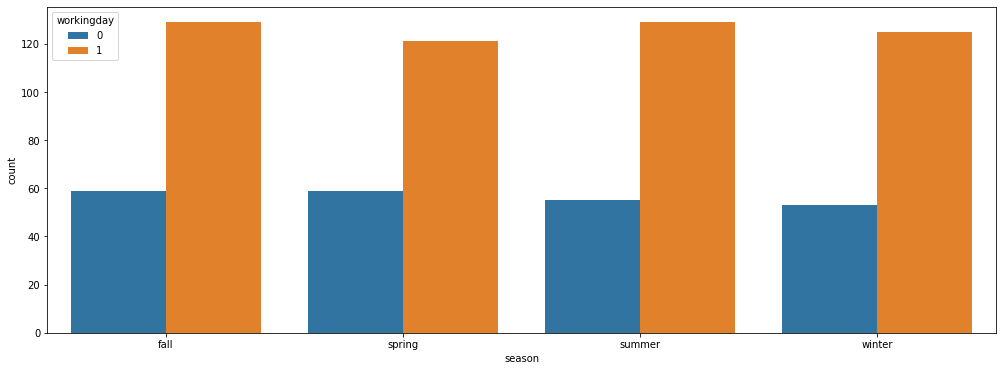

In [742]:
plt.figure(figsize = (17,6))
sns.countplot(x="season", data=bsp, hue = 'workingday')

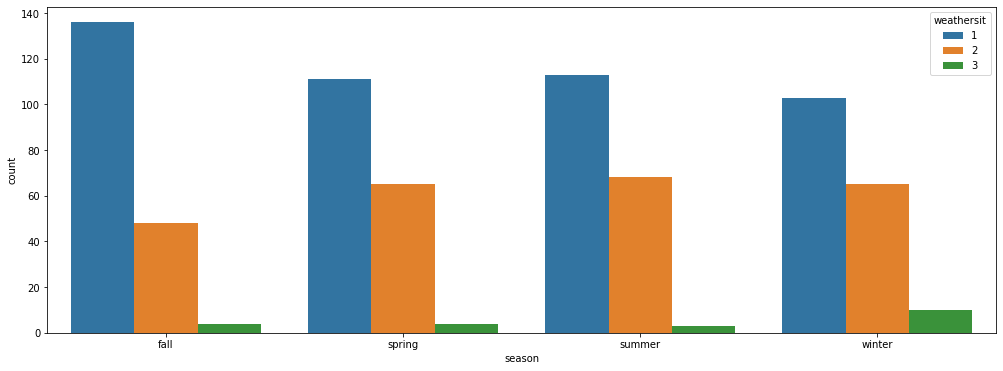

In [743]:
plt.figure(figsize = (17,6))
sns.countplot(x="season", data=bsp, hue = 'weathersit')

<font color=blue> Analysing 'mnth' column </font>

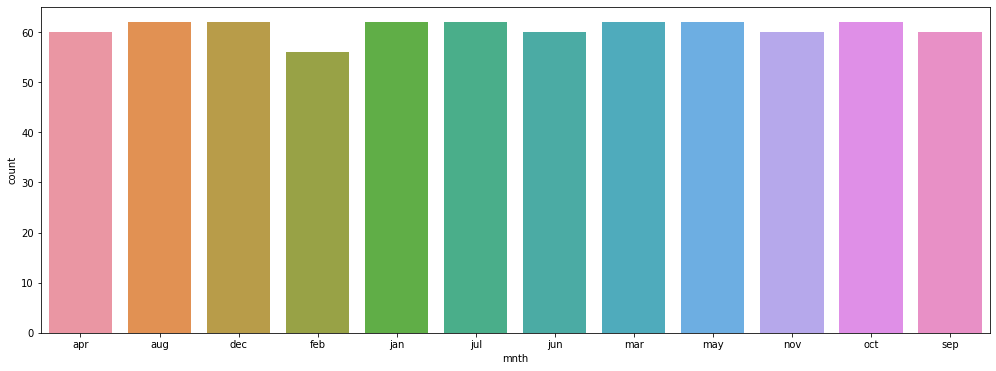

In [744]:
plt.figure(figsize = (17,6))
sns.countplot(x="mnth", data=bsp)
 

<font color=blue> Analysing 'mnth' column with respect to 'season' column </font>

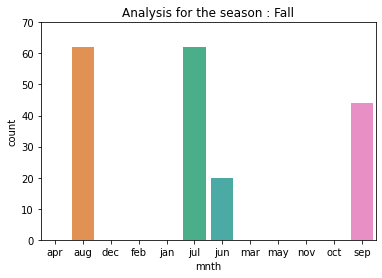

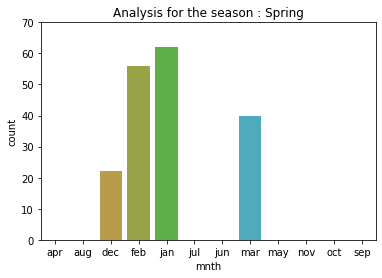

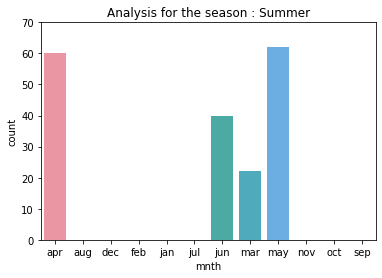

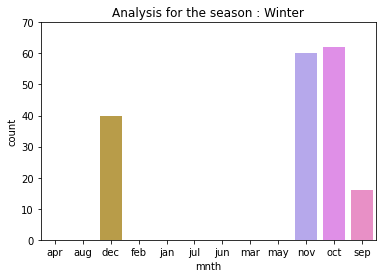

In [745]:
fall = bsp[bsp['season'] == 'fall']
spring = bsp[bsp['season'] == 'spring']
summer = bsp[bsp['season'] == 'summer']
winter = bsp[bsp['season'] == 'winter']

sns.countplot(x="mnth", data=fall)
plt.ylim(0,70)
plt.title('Analysis for the season : Fall')
plt.show()

sns.countplot(x="mnth", data=spring)
plt.ylim(0,70)
plt.title('Analysis for the season : Spring')
plt.show()

sns.countplot(x="mnth", data=summer)
plt.ylim(0,70)
plt.title('Analysis for the season : Summer')
plt.show()

sns.countplot(x="mnth", data=winter)
plt.ylim(0,70)
plt.title('Analysis for the season : Winter')
plt.show()

<font color=blue> Analysing 'mnth' column with 'holiday' column </font>

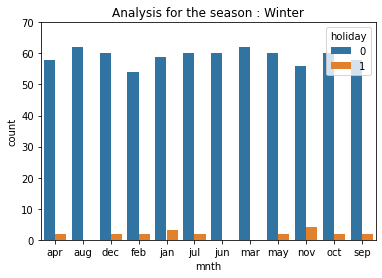

In [746]:
sns.countplot(x="mnth", data=bsp, hue = 'holiday')
plt.ylim(0,70)
plt.title('Analysis for the season : Winter')
plt.show()

<font color=blue> Analysing 'mnth' column with 'weekday' column </font>

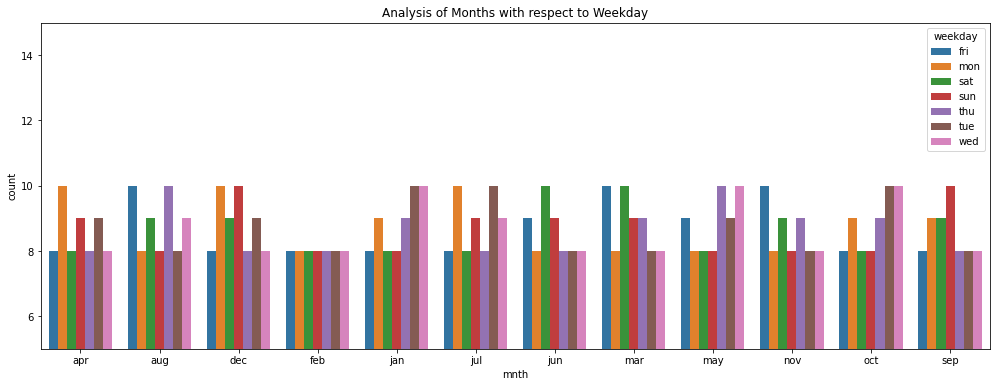

In [747]:
plt.figure(figsize = (17,6))
sns.countplot(x="mnth", data=bsp, hue = 'weekday')
plt.ylim(5,15)
plt.title('Analysis of Months with respect to Weekday')
plt.show()

<font color=blue> Analysing 'mnth' column with 'workingday' column </font>

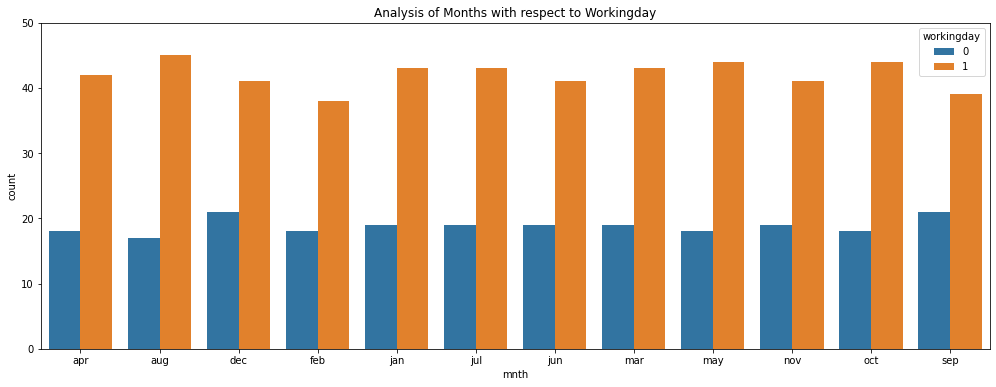

In [748]:
plt.figure(figsize = (17,6))
sns.countplot(x="mnth", data=bsp, hue = 'workingday')
plt.ylim(0,50)
plt.title('Analysis of Months with respect to Workingday')
plt.show()

<font color=blue> Analysing 'mnth' column with 'weathersit' column </font>

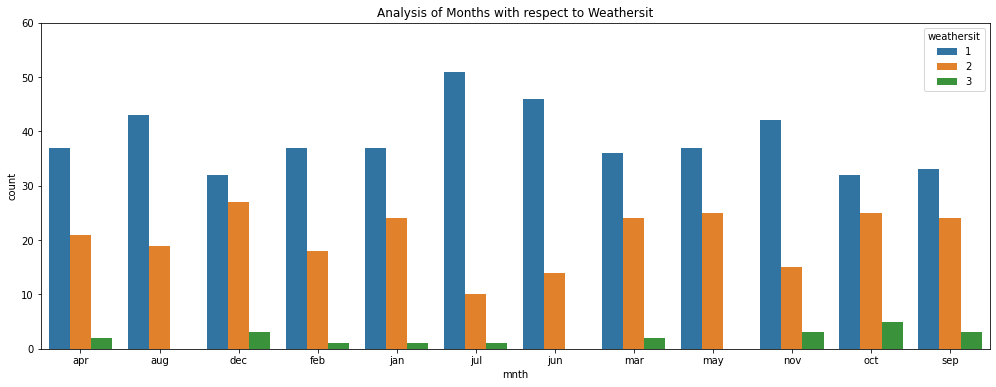

In [749]:
plt.figure(figsize = (17,6))
sns.countplot(x="mnth", data=bsp, hue = 'weathersit')
plt.ylim(0,60)
plt.title('Analysis of Months with respect to Weathersit')
plt.show()

<font color=blue> Analysing 'weekday' column with 'holiday' column </font>

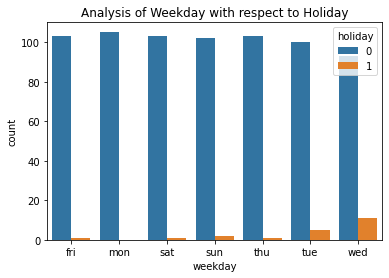

In [750]:
sns.countplot(x="weekday", data=bsp, hue = 'holiday')
plt.ylim(0,110)
plt.title('Analysis of Weekday with respect to Holiday')
plt.show()

<font color=blue> Analysing 'workingday' column with 'holiday' column </font>

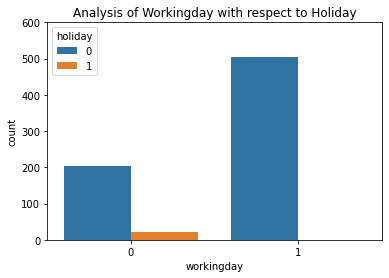

In [751]:
sns.countplot(x="workingday", data=bsp, hue = 'holiday')
plt.ylim(0,600)
plt.title('Analysis of Workingday with respect to Holiday')
plt.show()

<font color=blue> Analysing 'weathersit' column with 'holiday' column </font>

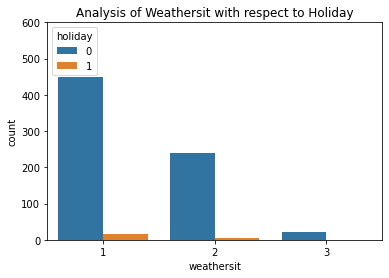

In [752]:
sns.countplot(x="weathersit", data=bsp, hue = 'holiday')
plt.ylim(0,600)
plt.title('Analysis of Weathersit with respect to Holiday')
plt.show()

<font color=blue> Analysing 'weekday' column with 'workingday' column </font>

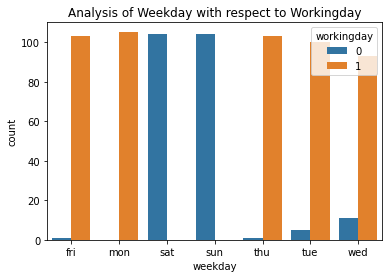

In [753]:
sns.countplot(x="weekday", data=bsp, hue = 'workingday')
plt.ylim(0,110)
plt.title('Analysis of Weekday with respect to Workingday')
plt.show()

<font color=blue> Analysing 'weekday' column with 'weathersit' column </font>

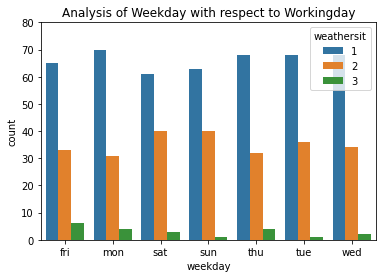

In [754]:
sns.countplot(x="weekday", data=bsp, hue = 'weathersit')
plt.ylim(0,80)
plt.title('Analysis of Weekday with respect to Workingday')
plt.show()

<font color=blue> Analysing 'workingday' column with 'weathersit' column </font>

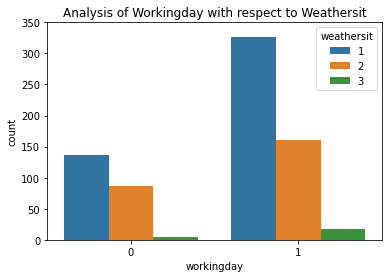

In [755]:
sns.countplot(x="workingday", data=bsp, hue = 'weathersit')
plt.ylim(0,350)
plt.title('Analysis of Workingday with respect to Weathersit')
plt.show()

<font color=blue> Analysing Categorical columns with Numeric columns</font>

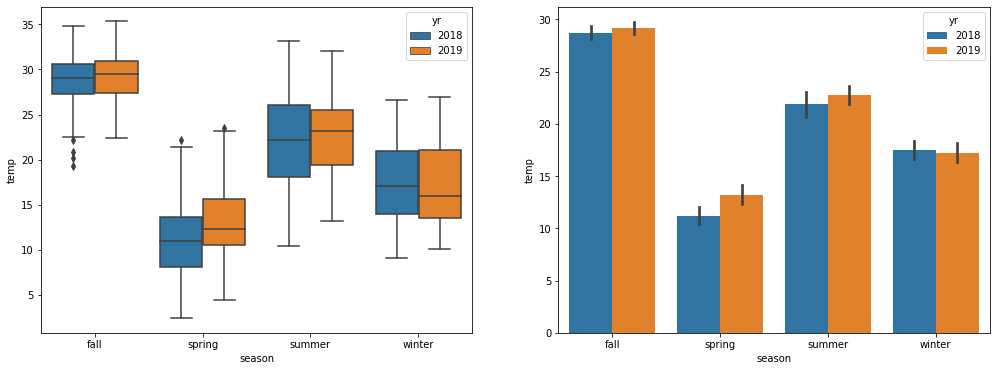

In [756]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="season", y="temp", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="season", y="temp", data=bsp, hue = 'yr')


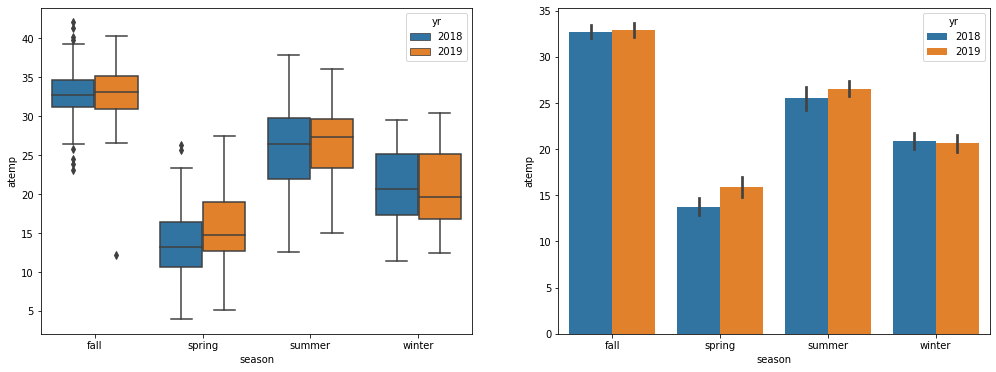

In [757]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="season", y="atemp", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="season", y="atemp", data=bsp, hue = 'yr')

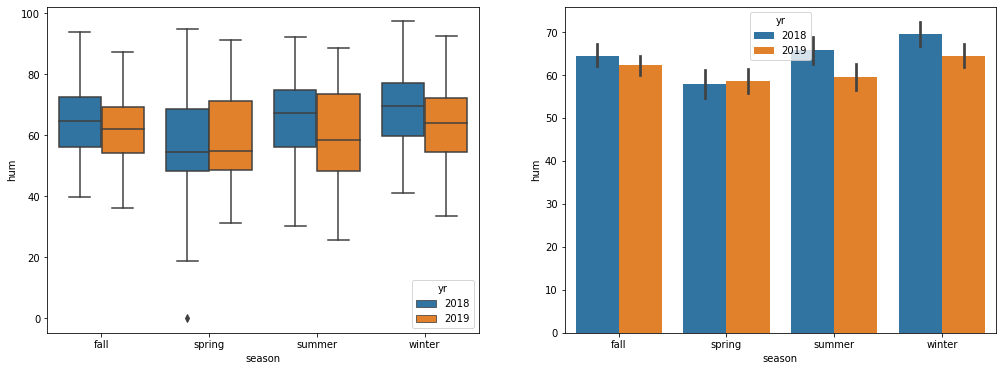

In [758]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="season", y="hum", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="season", y="hum", data=bsp, hue = 'yr')

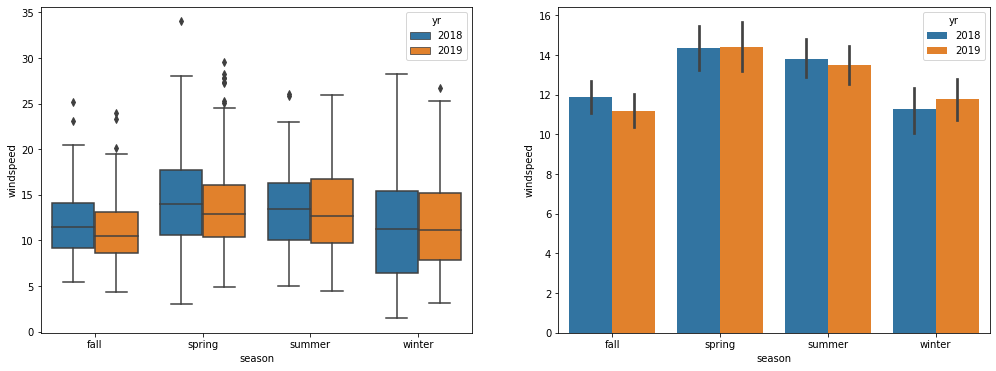

In [759]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="season", y="windspeed", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="season", y="windspeed", data=bsp, hue = 'yr')

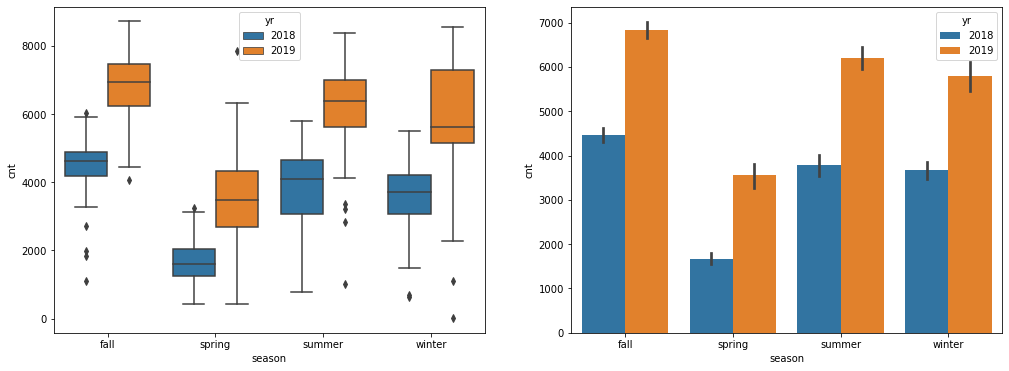

In [760]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="season", y="cnt", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="season", y="cnt", data=bsp, hue = 'yr')

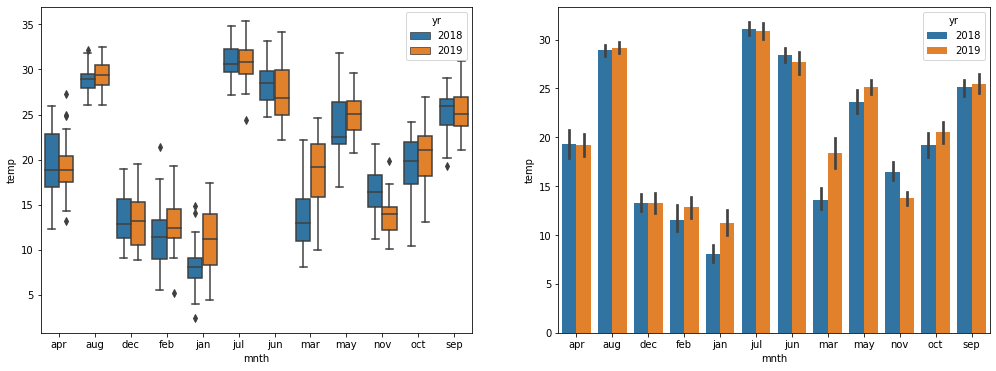

In [761]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="mnth", y="temp", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="mnth", y="temp", data=bsp, hue = 'yr')

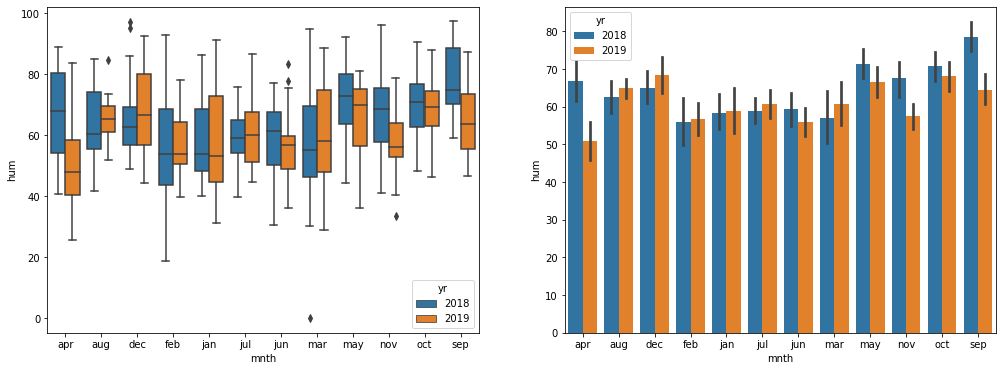

In [762]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="mnth", y="hum", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="mnth", y="hum", data=bsp, hue = 'yr')

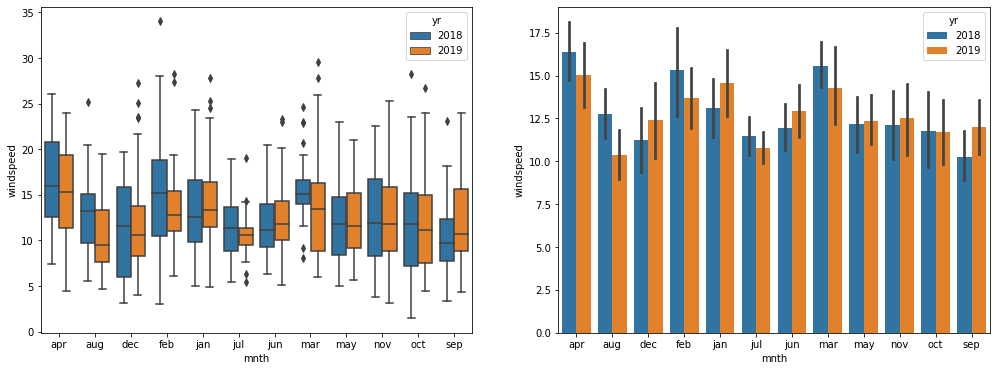

In [763]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="mnth", y="windspeed", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="mnth", y="windspeed", data=bsp, hue = 'yr')

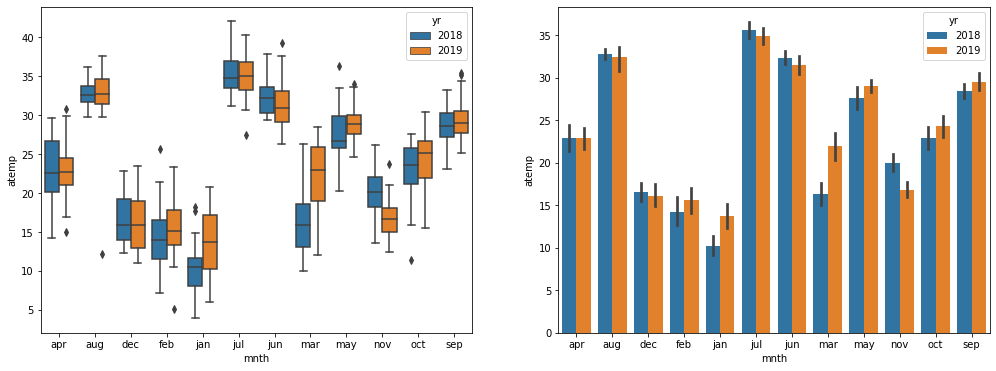

In [764]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="mnth", y="atemp", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="mnth", y="atemp", data=bsp, hue = 'yr')

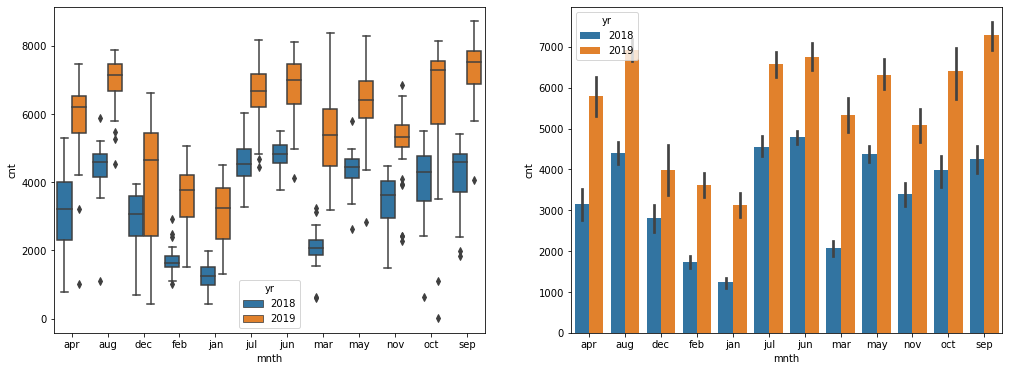

In [765]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="mnth", y="cnt", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="mnth", y="cnt", data=bsp, hue = 'yr')

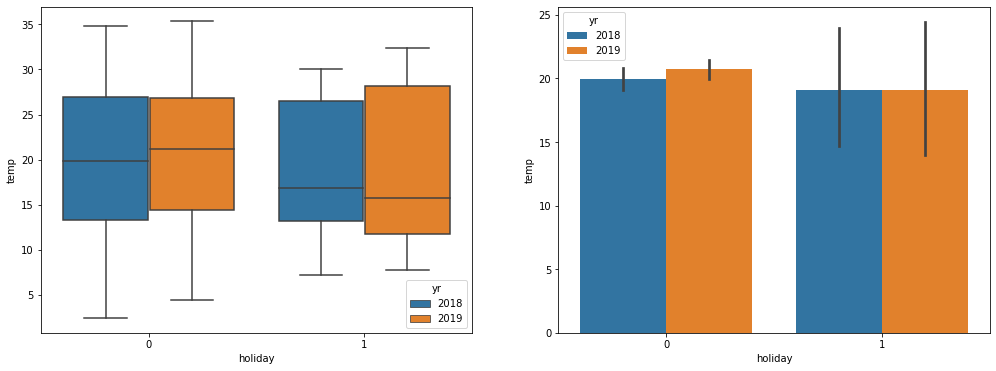

In [766]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="holiday", y="temp", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="holiday", y="temp", data=bsp, hue = 'yr')

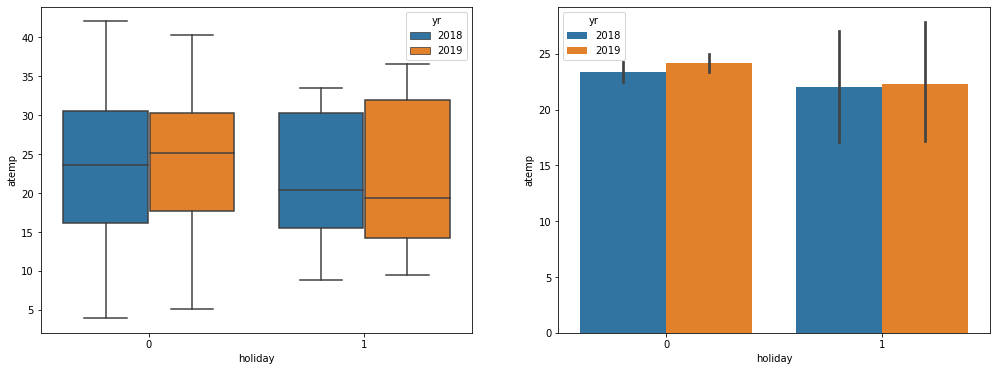

In [767]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="holiday", y="atemp", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="holiday", y="atemp", data=bsp, hue = 'yr')

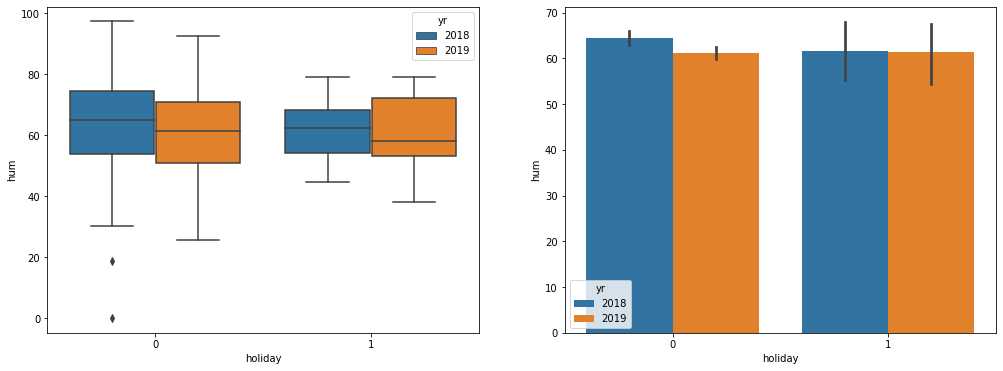

In [768]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="holiday", y="hum", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="holiday", y="hum", data=bsp, hue = 'yr')

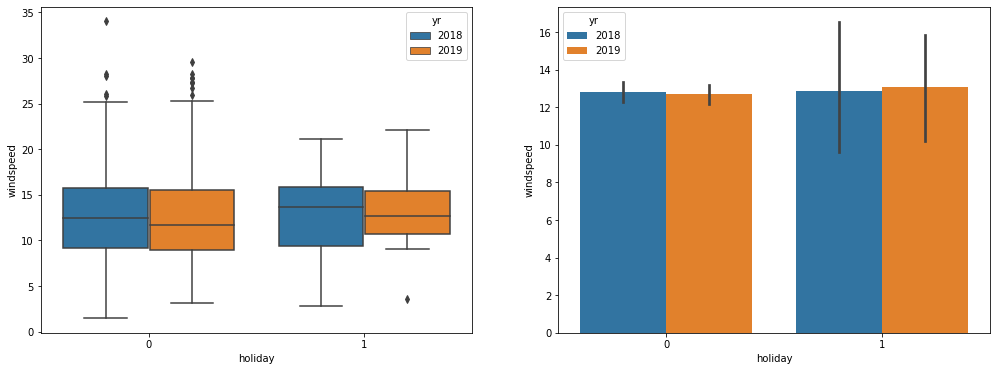

In [769]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="holiday", y="windspeed", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="holiday", y="windspeed", data=bsp, hue = 'yr')

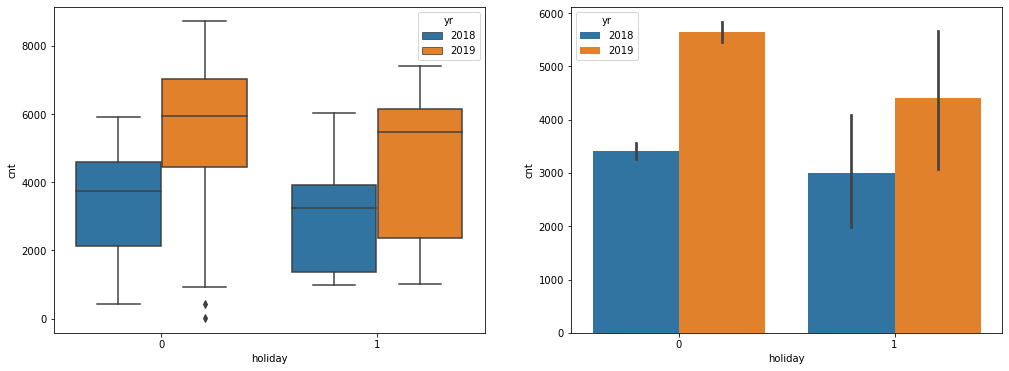

In [770]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="holiday", y="cnt", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="holiday", y="cnt", data=bsp, hue = 'yr')

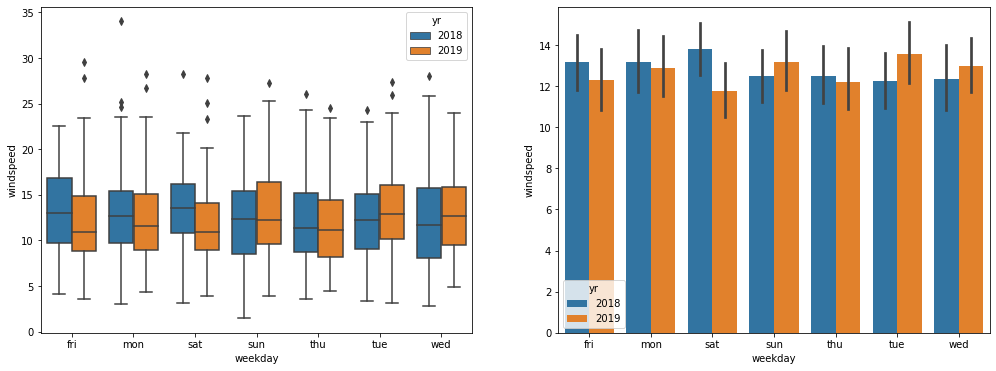

In [771]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="weekday", y="windspeed", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="weekday", y="windspeed", data=bsp, hue = 'yr')

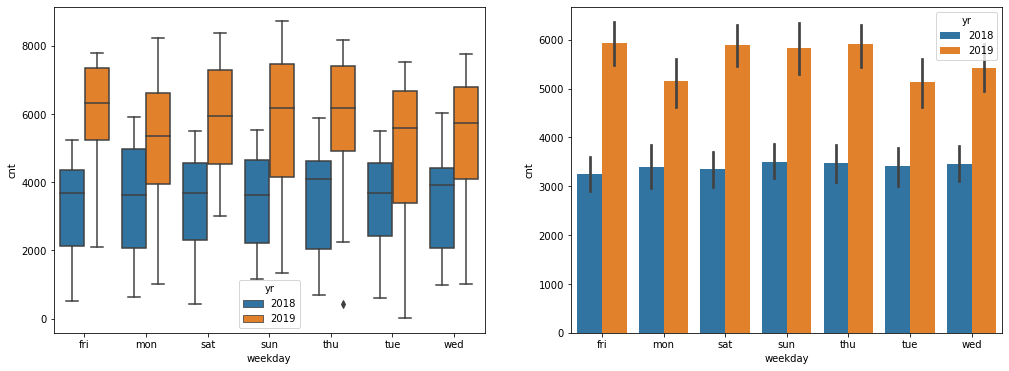

In [772]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="weekday", y="cnt", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="weekday", y="cnt", data=bsp, hue = 'yr')

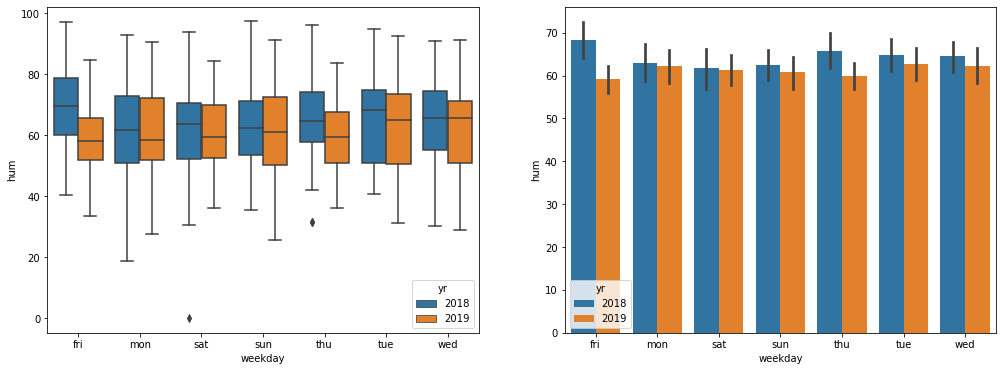

In [773]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="weekday", y="hum", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="weekday", y="hum", data=bsp, hue = 'yr')

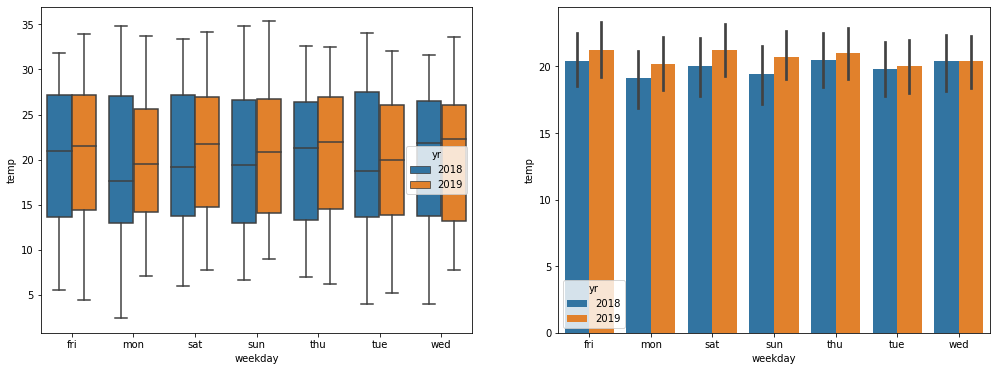

In [774]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="weekday", y="temp", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="weekday", y="temp", data=bsp, hue = 'yr')

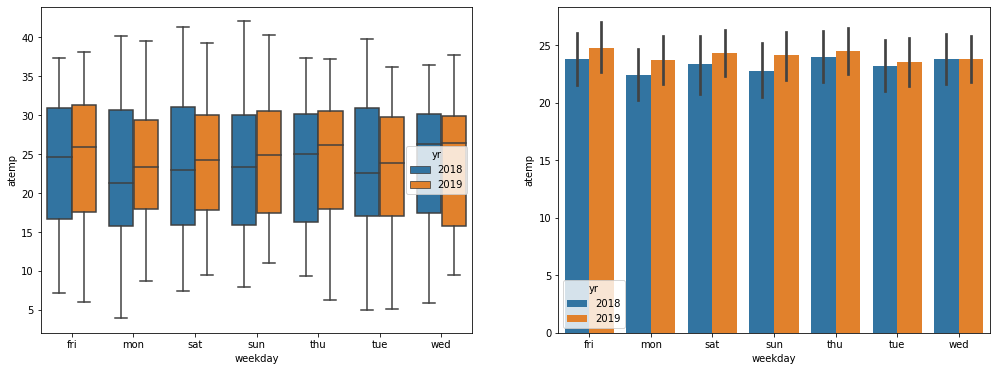

In [775]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="weekday", y="atemp", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="weekday", y="atemp", data=bsp, hue = 'yr')

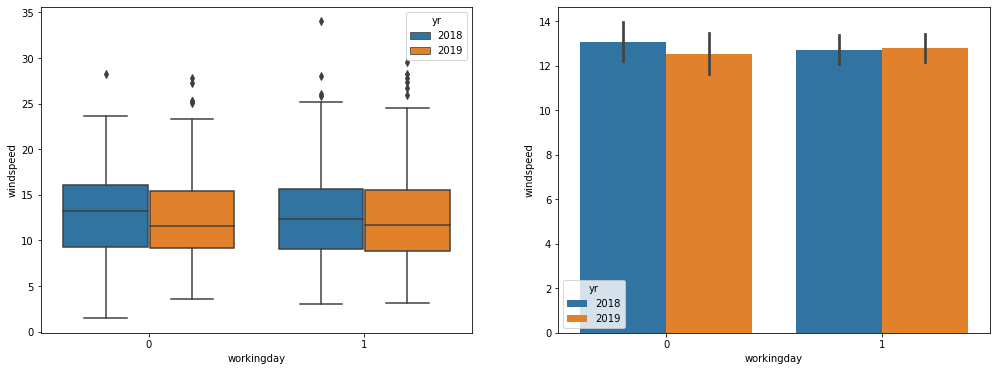

In [776]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="workingday", y="windspeed", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="workingday", y="windspeed", data=bsp, hue = 'yr')

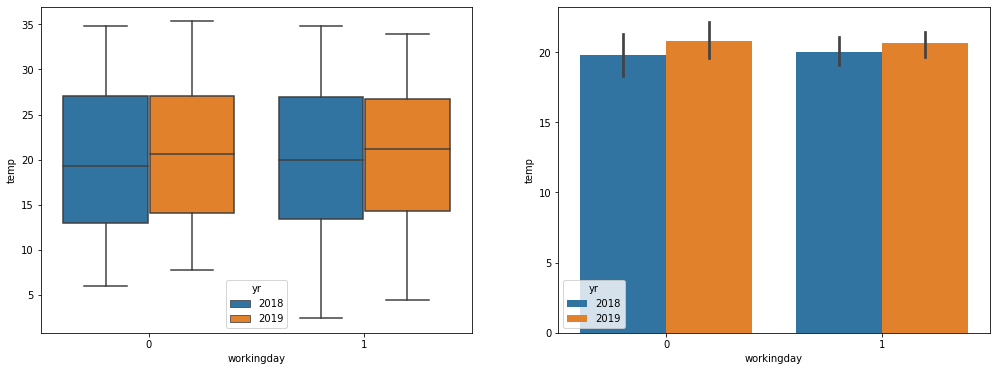

In [777]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="workingday", y="temp", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="workingday", y="temp", data=bsp, hue = 'yr')

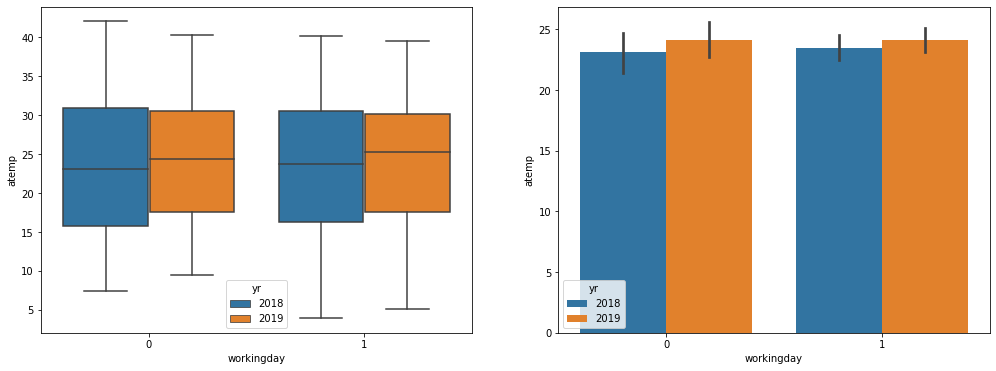

In [778]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="workingday", y="atemp", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="workingday", y="atemp", data=bsp, hue = 'yr')

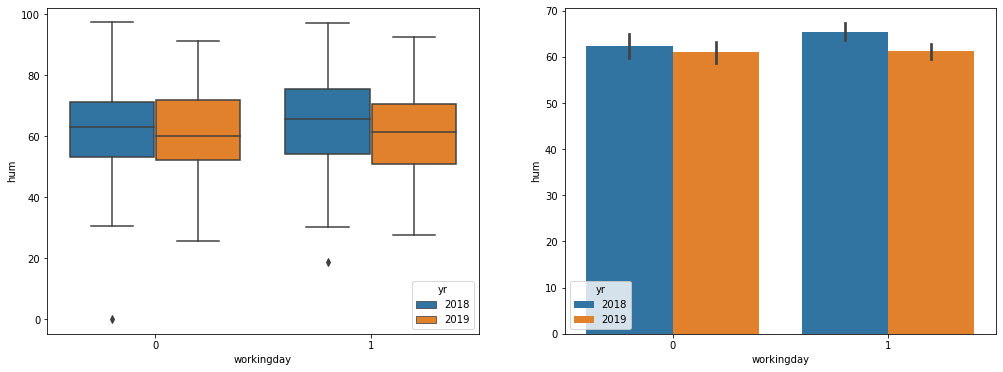

In [779]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="workingday", y="hum", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="workingday", y="hum", data=bsp, hue = 'yr')

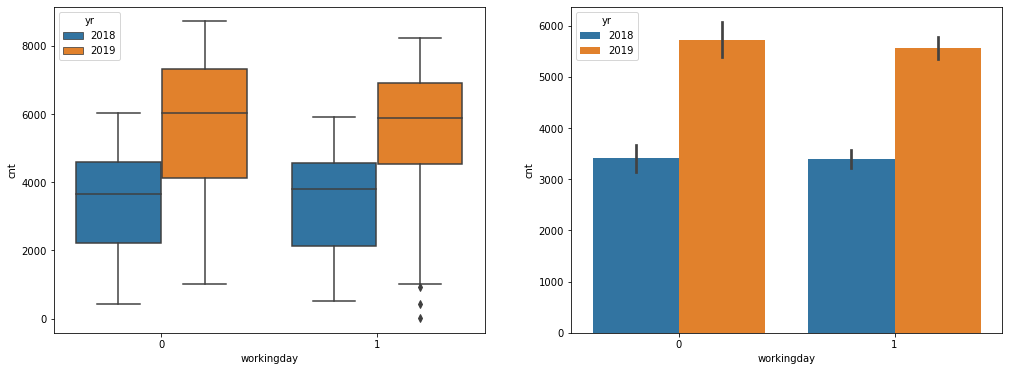

In [780]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="workingday", y="cnt", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="workingday", y="cnt", data=bsp, hue = 'yr')

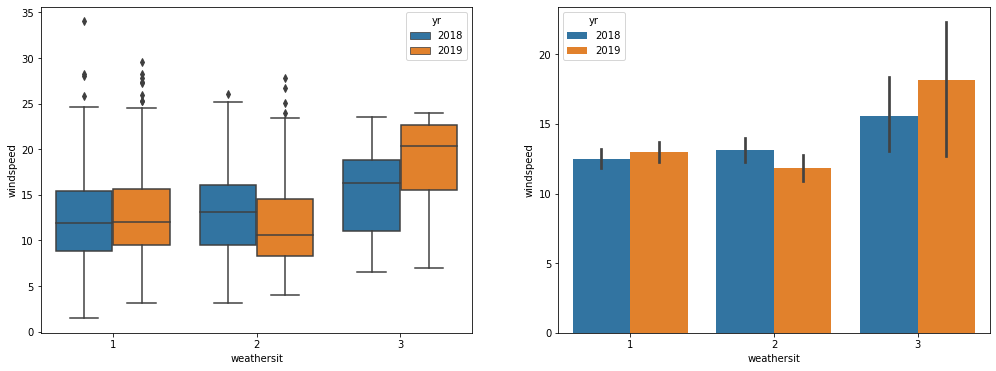

In [781]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="weathersit", y="windspeed", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="weathersit", y="windspeed", data=bsp, hue = 'yr')

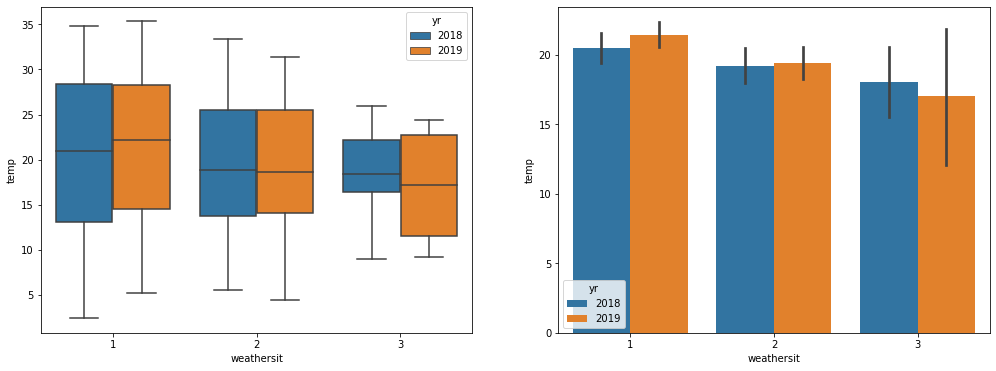

In [782]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="weathersit", y="temp", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="weathersit", y="temp", data=bsp, hue = 'yr')

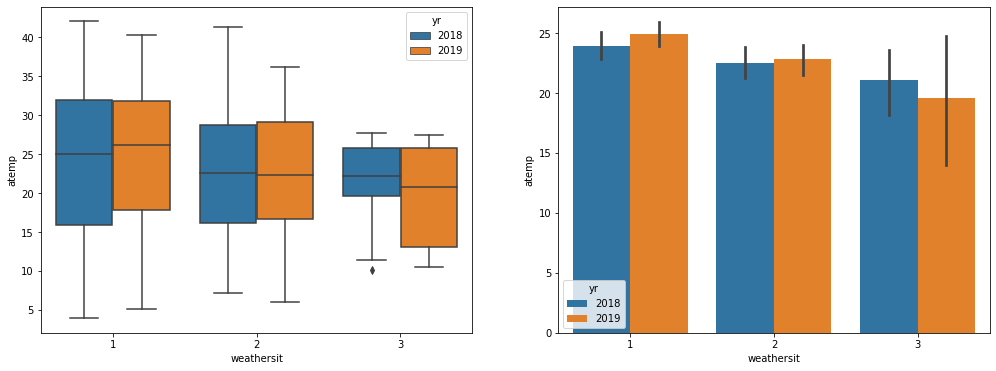

In [783]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="weathersit", y="atemp", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="weathersit", y="atemp", data=bsp, hue = 'yr')

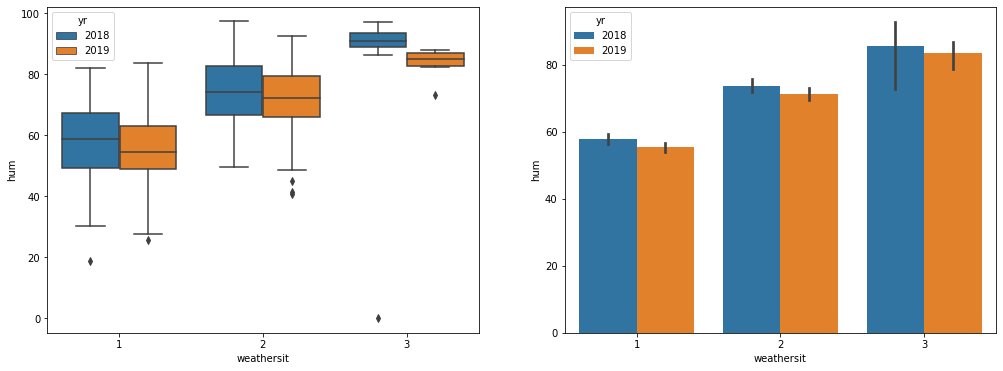

In [784]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="weathersit", y="hum", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="weathersit", y="hum", data=bsp, hue = 'yr')

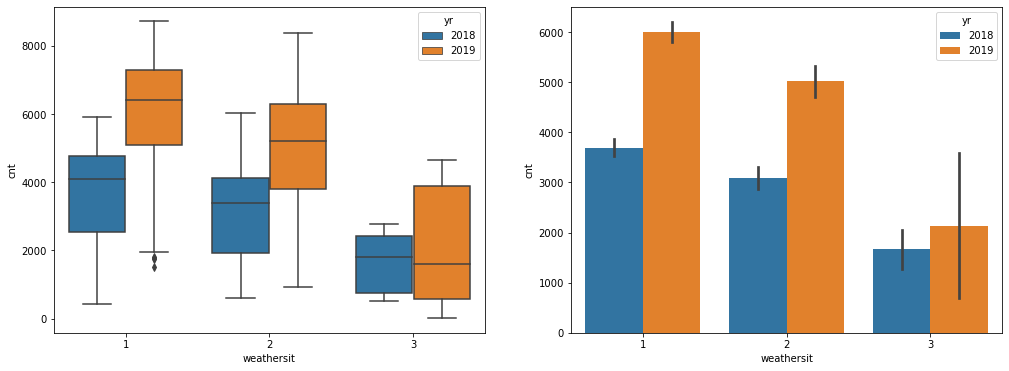

In [785]:
plt.figure(figsize = (17,6))

plt.subplot(1, 2, 1)
sns.boxplot(x="weathersit", y="cnt", data=bsp, hue = 'yr')

plt.subplot(1, 2, 2)
sns.barplot(x="weathersit", y="cnt", data=bsp, hue = 'yr')

<font color=blue> Analysing correlation matrix </font>

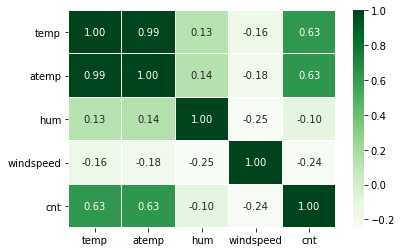

In [786]:
sns.heatmap(bsp.corr(),annot=True,cmap="Greens",linewidths=.1,fmt=".2f")

<font color=red> Observations </font>

1. "temp" and "atemp" are highly correlated
2. Temperature is slightly higher in 2019 as compared to 2018 
3. Spread of values for humidity and windspeed is almost same for 2018 and 2019
4. Peak of humidity lies between 50 - 70
5. 2019 has experienced more windspeed than 2018
6. 2018 has recorded lowest humidity at few points 
7. Count is more on working day and less on holiday 
8. Temperature seems to be highest in July and minimum in Jan
9. Winter has more humidity as compared to other seasons 
10. Windspeed is highest in spring 
11. Count has increased in 2019 as compared to 2018
12. Count is more in fall when temperature is around 27, which means people prefer outing in pleasant weather with temperature around 27
13. In the month of Jan, count is very low as the temperature in Jan is low so people won’t prefer outing


<font color=green> Creating dummy variables </font>

In [787]:
#Recreate the dummy vals by dropping the first column
newbsp=pd.get_dummies(bsp,drop_first=True)


In [788]:
# Getting difference between dates
max_day=max(bsp.date)
min_day=min(bsp.date)
diff=((max_day-min_day)/np.timedelta64(1, 'D'))
day_diff=(bsp.date - min(bsp.date)).dt.days/diff
day_diff

0      0.000000
1      0.001372
2      0.002743
3      0.004115
4      0.005487
         ...   
725    0.994513
726    0.995885
727    0.997257
728    0.998628
729    1.000000
Name: date, Length: 730, dtype: float64

In [789]:
#Dropping date parameter and using lag (difference between dates) parameter
newbsp.drop(columns=['date'],inplace=True)
newbsp['day_diff']=day_diff


<font color=green> Train-Test split </font>

In [790]:
temp=newbsp.copy()
y = temp.pop('cnt')
X = temp

In [791]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [792]:
X_train.head(5)

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,...,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_2,weathersit_3,day_diff
653,19.201653,23.0423,55.8333,12.208807,0,0,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0.895748
576,29.246653,33.1448,70.4167,11.083475,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0.790123
426,16.980847,20.6746,62.1250,10.792293,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0.584362
728,10.489153,11.5850,48.3333,23.500518,1,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0.998628
482,15.443347,18.8752,48.9583,8.708325,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0.661180


<font color=green> Scaling  </font>

In [793]:
scaler = MinMaxScaler()
scale_cols=['temp','atemp','hum','windspeed']
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_train.head()

<ipython-input-793-87f6378e620f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,...,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_2,weathersit_3,day_diff
653,0.509887,0.501133,0.575354,0.300794,0,0,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0.895748
576,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0.790123
426,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0.584362
728,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0.998628
482,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0.661180


<font color=green> Using RFE to select features </font>

In [794]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [795]:
# Choosing 10 features using RFE
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_aug', False, 15),
 ('mnth_dec', False, 6),
 ('mnth_feb', False, 7),
 ('mnth_jan', False, 4),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 19),
 ('mnth_mar', False, 21),
 ('mnth_may', False, 12),
 ('mnth_nov', False, 5),
 ('mnth_oct', False, 18),
 ('mnth_sep', True, 1),
 ('holiday_1', True, 1),
 ('weekday_mon', False, 14),
 ('weekday_sat', False, 9),
 ('weekday_sun', False, 10),
 ('weekday_thu', False, 20),
 ('weekday_tue', False, 13),
 ('weekday_wed', False, 16),
 ('workingday_1', False, 8),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1),
 ('day_diff', False, 17)]

In [796]:
#Features selected by RFE
rfe_sup_col = X_train.columns[rfe.support_]
rfe_sup_col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_jul', 'mnth_sep', 'holiday_1', 'weathersit_3'],
      dtype='object')

In [797]:
# Rejected columns
X_train.columns[~rfe.support_]

Index(['atemp', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'workingday_1', 'weathersit_2',
       'day_diff'],
      dtype='object')

<font color=green> Building Model using statsmodel library </font>

In [798]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[rfe_sup_col]

# Adding a constant 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          1.53e-184
Time:                        22:44:47   Log-Likelihood:                -4136.1
No. Observations:                 510   AIC:                             8294.
Df Residuals:                     499   BIC:                             8341.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3298.4180    270.035     12.215      0.000    2767.873    3828.963
temp           4473.5451    270.431     16.542      0.000    3942.222    5004.868
hum           -2371.2399    277.592     -8.542      0.000   -2916.633   -1825.847
windspeed     -1639.9625    227.963     -7.194      0.000   -2087.849   -1192.076
season_spring  -873.8125    133.700     -6.536      0.000   -1136.497    -611.128
season_winter   567.4268    110.108      5.153      0.000     351.094     783.759
yr_2019        1982.2176     73.140     27.102      0.000    1838.517    2125.919
mnth_jul       -700.1320    154.292     -4.538      0.000   -1003.274    -396.990
mnth_sep        519.4493    139.523      3.723      0.000     245.325     793.573
holiday_1      -799.6626    230.334     -3.472      0.001   -1252.207    -347.118
weathersit_3  -1720.7699    224.677     -7.659      0.000   -2162.199   -1279.341
==============================================================================
Omnibus:                       51.023   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.492
Skew:                          -0.593   Prob(JB):                     1.51e-22
Kurtosis:                       4.823   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color=red> Observation </font>

1. P values of all features are low and acceptable 
2. F stats is high and prob (F stat) is low which is good
3. R square of model comes around 83%

<font color=green> Calculating VIF </font>

In [799]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.13
1,temp,2.87
4,season_spring,2.53
5,season_winter,1.75
7,mnth_jul,1.29
2,hum,1.26
3,windspeed,1.15
8,mnth_sep,1.11
10,weathersit_3,1.11
6,yr_2019,1.03


<font color=red> Observation </font>

All VIF values are below 5 (which are acceptable) except const.  

<font color=green> Residual analysis </font>

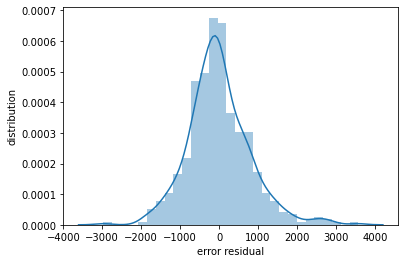

In [800]:
y_train_pred = lm.predict(X_train_rfe)
sns.distplot((y_train_pred-y_train))
plt.xlabel('error residual')
plt.ylabel('distribution')
plt.show()

<font color=red> Observation </font>

Error follows normal distribution and is centered at zero which proves our linear regression assumptions to be true 

### <font color=green> Building another model by considering derived column named 'temp_diff' and analysing the results</font>

<font color=blue> We can observe that cnt is maximum at 27, so we can consider it as a base line and add new column named "temp_diff" which will difference between 'temp' and 27</font>

In [801]:
bsp3=newbsp.copy()
bsp3['temp_diff']=abs(bsp3['temp']-27)

In [802]:
y = bsp3.pop('cnt')
X = bsp3


In [803]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_2,weathersit_3,day_diff,temp_diff
653,19.201653,23.0423,55.8333,12.208807,0,0,1,1,0,0,...,0,0,0,0,1,1,0,0,0.895748,7.798347
576,29.246653,33.1448,70.4167,11.083475,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0.790123,2.246653
426,16.980847,20.6746,62.1250,10.792293,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0.584362,10.019153
728,10.489153,11.5850,48.3333,23.500518,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0.998628,16.510847
482,15.443347,18.8752,48.9583,8.708325,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0.661180,11.556653


In [804]:
scaler = MinMaxScaler()
scale_cols=['temp','atemp','hum','windspeed','temp_diff']
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_train.head()

<ipython-input-804-3225dd1ce97c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_2,weathersit_3,day_diff,temp_diff
653,0.509887,0.501133,0.575354,0.300794,0,0,1,1,0,0,...,0,0,0,0,1,1,0,0,0.895748,0.315649
576,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0.790123,0.089194
426,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0.584362,0.406236
728,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0.998628,0.671034
482,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0.661180,0.468952


In [805]:
#Building model
#Using RFE to pick top 10 features 
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)            
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
X_train.columns[rfe.support_]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Index(['hum', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'holiday_1', 'weathersit_2', 'weathersit_3', 'day_diff', 'temp_diff'],
      dtype='object')

In [806]:
#Columns chosen by RFE
rfe_sup_col = X_train.columns[rfe.support_]

In [807]:
X_train_rfe = X_train[rfe_sup_col]
# Adding a constant 
X_train_rfe = sm.add_constant(X_train_rfe)

In [808]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [809]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     325.0
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          2.98e-211
Time:                        22:44:48   Log-Likelihood:                -4073.1
No. Observations:                 510   AIC:                             8168.
Df Residuals:                     499   BIC:                             8215.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7035.2230    250.670     28.066      0.000    6542.724    7527.722
hum           -1872.3341    303.647     -6.166      0.000   -2468.918   -1275.751
windspeed     -1681.4903    202.383     -8.308      0.000   -2079.118   -1283.862
season_spring  -692.1280    120.913     -5.724      0.000    -929.689    -454.567
season_winter   594.9022    123.823      4.804      0.000     351.624     838.181
yr_2019        2061.4173    195.169     10.562      0.000    1677.964    2444.871
holiday_1      -806.3734    203.462     -3.963      0.000   -1206.122    -406.625
weathersit_2   -468.8716     83.311     -5.628      0.000    -632.556    -305.188
weathersit_3  -2106.9413    209.301    -10.067      0.000   -2518.162   -1695.721
day_diff       -187.5985    374.139     -0.501      0.616    -922.680     547.483
temp_diff     -4444.7553    213.970    -20.773      0.000   -4865.148   -4024.363
==============================================================================
Omnibus:                       68.873   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.197
Skew:                          -0.638   Prob(JB):                     7.52e-45
Kurtosis:                       5.817   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color=red> Observation </font>

1. Accuracy of the model increases from 83% to 86.7% 
2. Adjusted R2 comes out to be 86.4% which is close to R2 
3. We can observe that p value of day_diff is NOT acceptable as it is more than 0.05 

Hence we should remove day_diff column from the dataset

In [810]:
#Removing day_diff column and building model again 
rfe_sup_col=[i for i in rfe_sup_col if not i=='day_diff']
X_train_rfe=X_train[rfe_sup_col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     361.6
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          1.73e-212
Time:                        22:44:48   Log-Likelihood:                -4073.2
No. Observations:                 510   AIC:                             8166.
Df Residuals:                     500   BIC:                             8209.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6987.4103    231.651     30.163      0.000    6532.280    7442.541
hum           -1878.8351    303.143     -6.198      0.000   -2474.425   -1283.245
windspeed     -1674.7128    201.780     -8.300      0.000   -2071.154   -1278.272
season_spring  -676.9291    116.964     -5.788      0.000    -906.730    -447.128
season_winter   554.2746     93.562      5.924      0.000     370.452     738.097
yr_2019        1969.0968     64.686     30.441      0.000    1842.007    2096.187
holiday_1      -810.4361    203.149     -3.989      0.000   -1209.567    -411.306
weathersit_2   -466.1458     83.071     -5.611      0.000    -629.358    -302.934
weathersit_3  -2104.0434    209.065    -10.064      0.000   -2514.798   -1693.289
temp_diff     -4422.0246    208.956    -21.162      0.000   -4832.564   -4011.485
==============================================================================
Omnibus:                       69.287   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.669
Skew:                          -0.640   Prob(JB):                     2.19e-45
Kurtosis:                       5.836   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [811]:
#Checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.97
9,temp_diff,2.51
3,season_spring,2.48
1,hum,1.93
4,season_winter,1.62
7,weathersit_2,1.54
8,weathersit_3,1.23
2,windspeed,1.16
5,yr_2019,1.03
6,holiday_1,1.01


All the values are in acceptable range except const which is okay

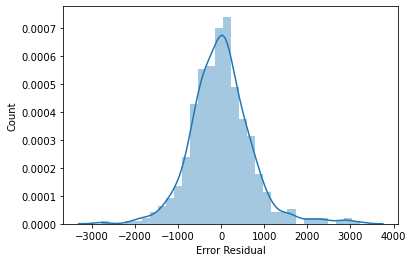

In [812]:
#Residual analysis 
y_train_pred = lm.predict(X_train_rfe)
sns.distplot((y_train_pred-y_train))
plt.xlabel('Error Residual')
plt.ylabel('Count')
plt.show()

Error follows normal distribution and is centered at zero which proves our linear regression assumptions to be true 

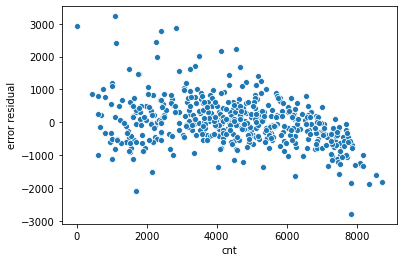

In [813]:
#Checking Error spread 
sns.scatterplot(y_train,(y_train_pred-y_train))
plt.ylabel('error residual')
plt.show()

There is no such pattern observed and error terms are randomly distributed which proves our linear regression assumptions to be true 

In [814]:
# Making predictions 

X_test[scale_cols] = scaler.fit_transform(X_test[scale_cols])
X_test_rfe=X_test[rfe_sup_col]
X_test_rfe=sm.add_constant(X_test_rfe)
rfe_sup_col

<ipython-input-814-da83c4747e38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[scale_cols] = scaler.fit_transform(X_test[scale_cols])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


['hum',
 'windspeed',
 'season_spring',
 'season_winter',
 'yr_2019',
 'holiday_1',
 'weathersit_2',
 'weathersit_3',
 'temp_diff']

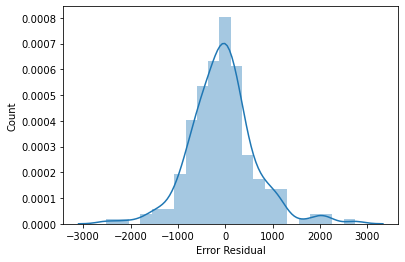

In [815]:
y_test_pred=lm.predict(X_test_rfe)
sns.distplot((y_test_pred-y_test))
plt.xlabel('Error Residual')
plt.ylabel('Count')
plt.show()

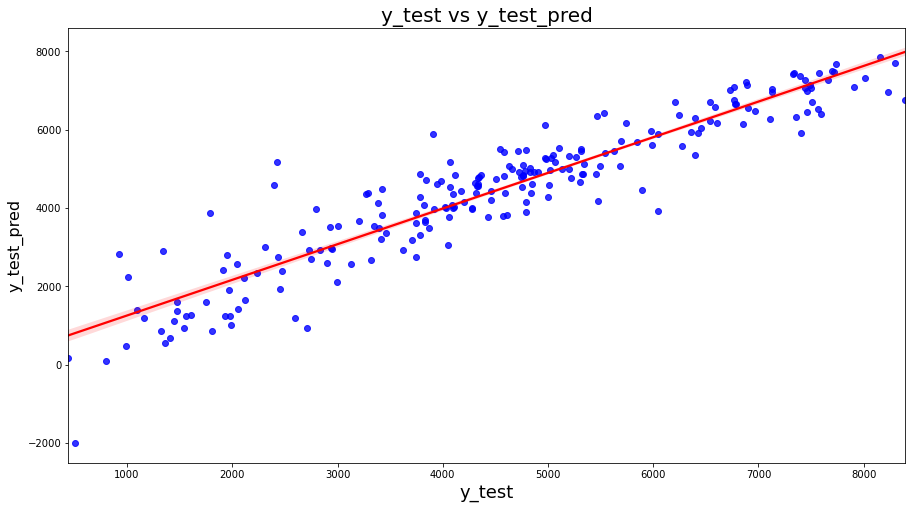

In [816]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_test_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_test_pred', fontsize=16)                          
plt.show()

We can say that predictions are very near to the actual values and this model is the best fit

In [817]:
# Checking the accuracy of test set 

from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test, y_test_pred)
rsquare = r2_score(y_test, y_test_pred)
print('MSE',MSE)
print('R2_Score',rsquare)

MSE 489588.9433052931
R2_Score 0.8635615162780149


<font color=red> Observation </font>

1. Accuracy on Train set was 86.7% and accuracy on Test set is 86.3% which is close and hence we can be sure that our model is working properly for test set as well 

2. P value, VIF, prob(Fstat) and Fstat all fall within acceptable range

## <font color=Green> Conclusion </font>



#### Comparison between Train model and Test model results:

- Train R^2 : 0.867
- Train Adjusted R^2 : 0.864
- Test R^2: 0.863
- Difference in R^2 between train and test: 0.004% (acceptable)


We can see that some variables have negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. 
We have holiday, hum, windspeed, temp_diff, weathersit_2, weathersit_3 variables with negative coefficient. 


### <font color=green> Interpretation </font>

1. Climate has significant impact on demand for bikes
2. Windspeed, Humidity, temperature plays major role in estimating demands for bikes
3. When the temperature is around 27, demand for bikes increases 
4. Boombikes can think of giving discounts in the months where demand is low in order to boost revenue 
5. Demand for bikes seem to be more on workingdays 